## Preprocess, cluster, and label dataset

Reference: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import sys
sys.path.insert(0, 'D:/GitHub/sample_workflow/')
from HelperFunctions import qc_and_filter, \
                            label_cells, \
                            plot_clusters

c:\Users\Owner\anaconda3\envs\curate\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Owner\anaconda3\envs\curate\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [3]:
# Dataset id
ds_id = 'Miller2023'

# Base file path
base = f'D:/GitHub/Data/NSCLC/{ds_id}/'

# Path to AnnData
adata_path = f'{base}{ds_id}_anndata.h5ad'

# Path to save AnnData
save_path = f'{base}{ds_id}_anndata_processed.h5ad'

# Path to save figures
save_as = f'D:/GitHub/sample_workflow/dashboard_analysis/dashboard/static/{ds_id}/'

# Read AnnData
adata = sc.read_h5ad(adata_path)

In [4]:
adata

AnnData object with n_obs × n_vars = 16487 × 33538
    obs: 'barcode', 'sample'
    var: 'ENSG_id', 'gene_name'

In [5]:
# Filter the data and perform some quality control checks
adata = qc_and_filter(adata, save_as, ds_id)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 23.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.3%
Elapsed time: 14.7 seconds
Percent doublets: 0.017322993252089837


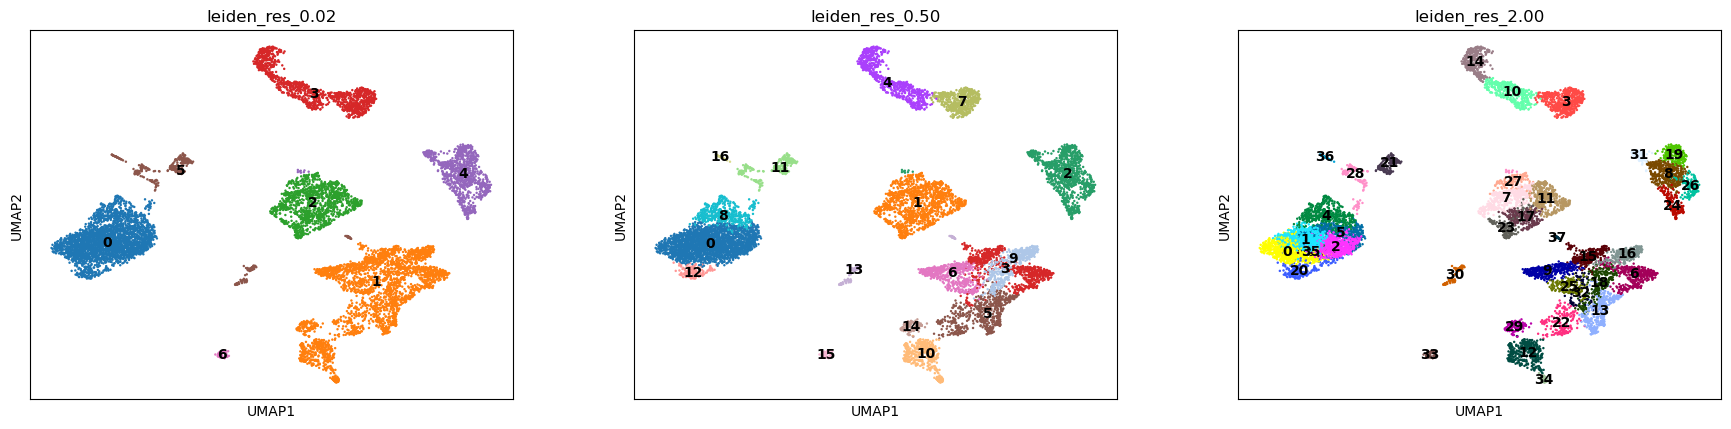

In [9]:
# Prepare to label cell types in the AnnData
adata, marker_genes = label_cells(adata, save_as, ds_id)

categories: 0, 1, 2, etc.
var_group_labels: CD14+ Mono, CD16+ Mono, cDC2, etc.


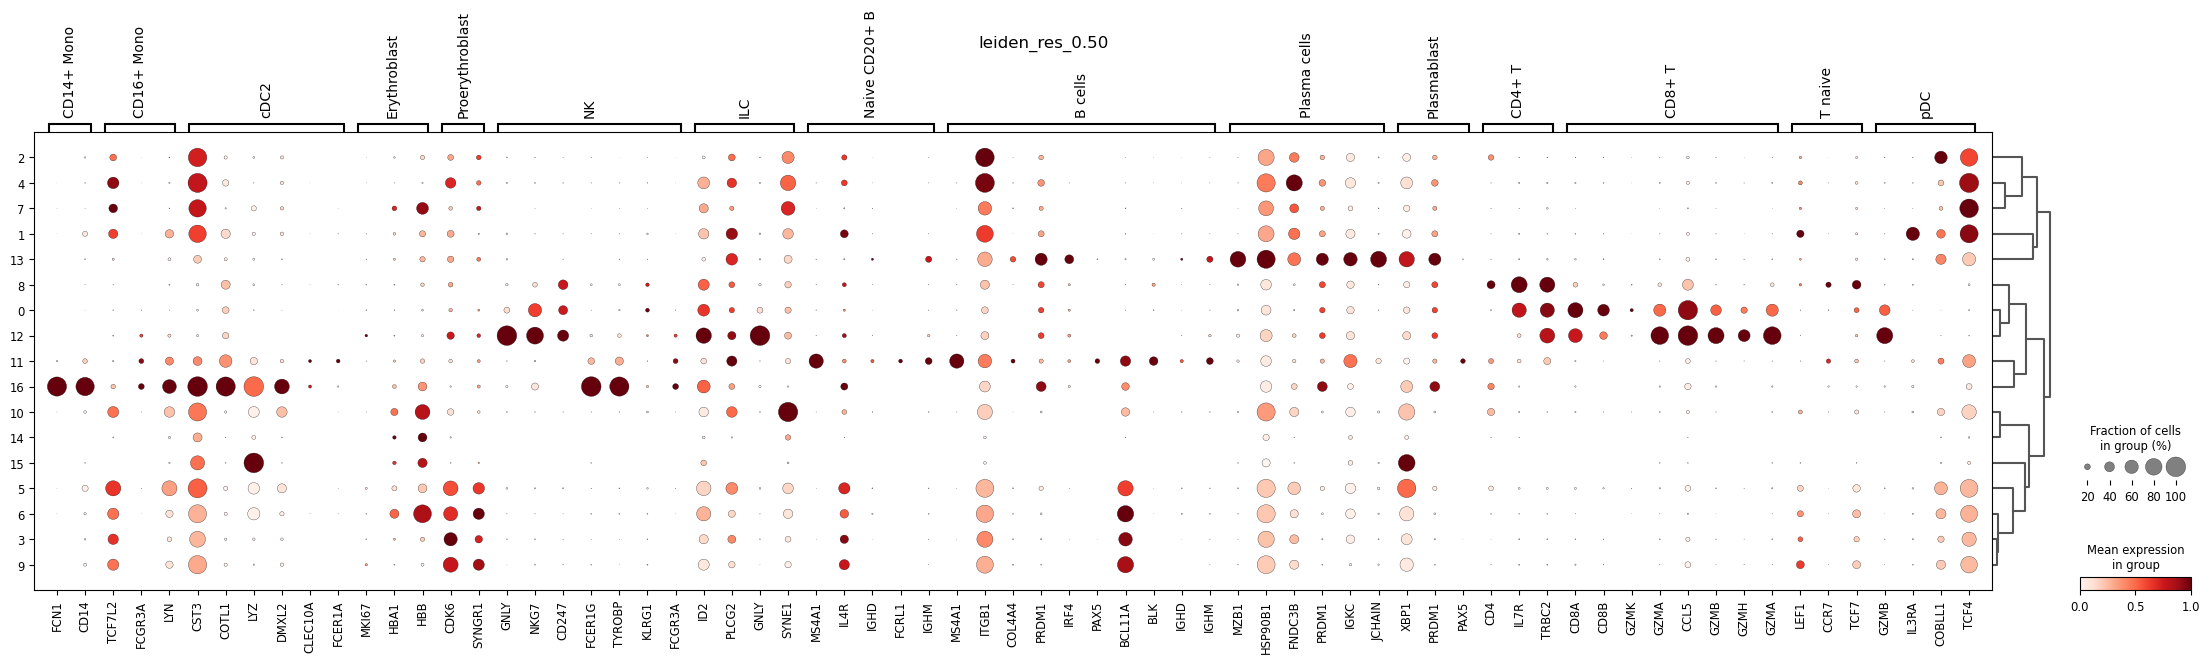

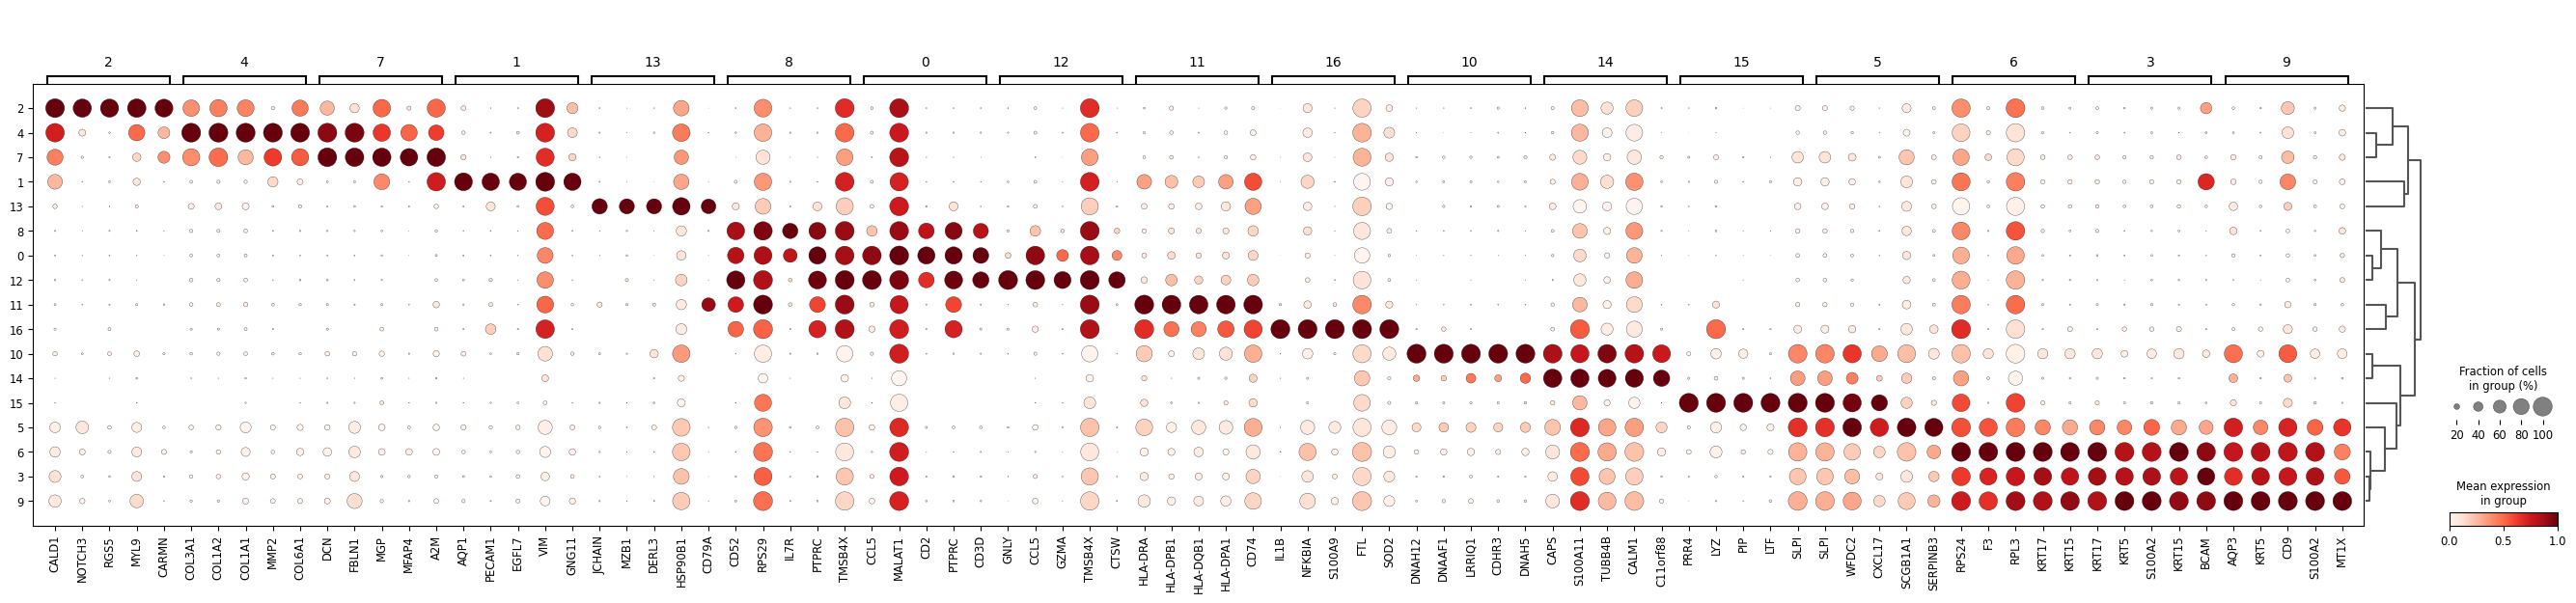

In [19]:
# Determine which resolutions may be useful for labelling cell types
plot_clusters(adata, marker_genes, save_as, ds_id, "leiden_res_0.50")

In [21]:
# Label cell types based on the previous cells
adata.obs["cell_type"] = adata.obs["leiden_res_0.50"].map(
    {
        "0": "T cells",
        "1": "",
        "2": "",
        "3": "",
        "4": "",
        "5": "",
        "6": "",
        "7": "",
        "8": "T cells",
        "9": "",
        "10": "",
        "11": "B cells",
        "12": "T cells",
        "13": "Plasma cells",
        "14": "",
        "15": "",
        "16": "",
    }
)
adata.obs['cell_type'] = adata.obs['cell_type'].replace('', 'Undetermined', regex=True)

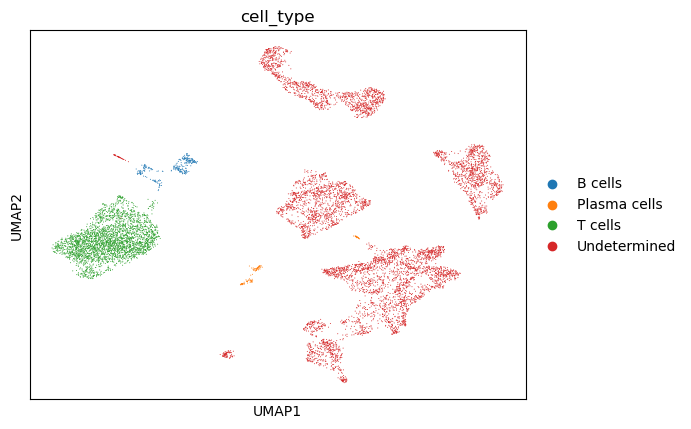

In [23]:
# Plot and save cell type results
sc._settings.ScanpyConfig(figdir=save_as)
sc.pl.umap(adata, color="cell_type", size=2, show=True, save=f'_celltypes_{ds_id}.png')

In [24]:
# Save AnnData
adata.write(save_path)
adata

AnnData object with n_obs × n_vars = 9757 × 21609
    obs: 'barcode', 'sample', 'n_genes', 'nFeature_RNA', 'nCount_RNA', 'total_counts_mt', 'percent.mt', 'DoubletScores', 'leiden', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00', 'cell_type'
    var: 'ENSG_id', 'gene_name', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors', 'leiden', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00', 'leiden_res_0.02_colors', 'leiden_res_0.50_colors', 'leiden_res_2.00_colors', 'rank_genes_groups', 'dendrogram_leiden_res_0.02', 'dendrogram_leiden_res_0.50', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log2norm'
    obsp: 'distances', 'connectivities'